In [1]:
!pip install matplotlib numpy scikit-learn pandas torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 433.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 398.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 417.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 377.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 429.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 393.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 464.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 484.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 496.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataframe = pd.read_csv("data/framingham.csv") #### read file to dataframe
dataframe = dataframe.dropna()
print("number of data: ", len(dataframe)) ### we have 4238 records 

number of data:  3656


In [4]:
###### from that => imbalace data
have_disease = dataframe[dataframe['TenYearCHD'] == 1]
nohave_disease = dataframe[dataframe['TenYearCHD'] == 0]
total_records = len(dataframe)
number_records_dis = len(have_disease)
number_records_nodis = len(nohave_disease)
print("we got total "+str(total_records)+" records")
print(str(number_records_nodis)+" records have not heart disease")
print(str(number_records_dis)+" records have heart disease")

we got total 3656 records
3099 records have not heart disease
557 records have heart disease


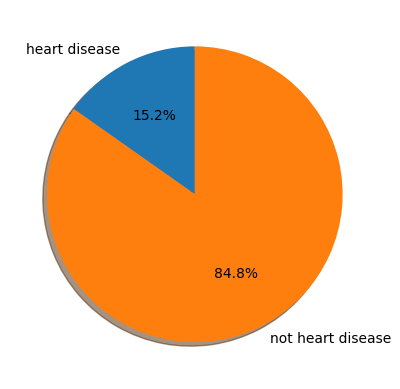

<Figure size 640x480 with 0 Axes>

In [6]:
labels = 'heart disease', 'not heart disease'
sizes = [number_records_dis/total_records, number_records_nodis/total_records]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

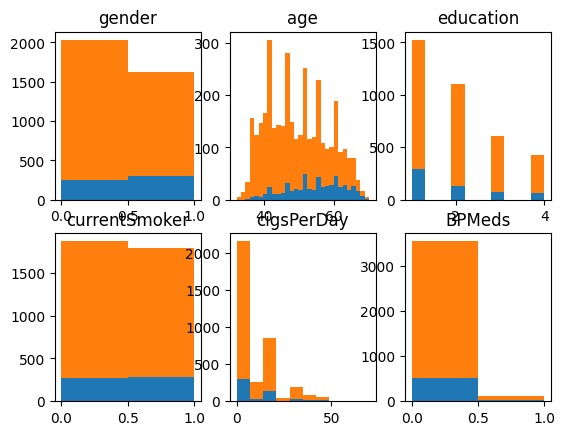

In [7]:
plt.clf()

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3)
ax0.hist((have_disease['male'], nohave_disease['male']), 2, histtype='bar', stacked=True)
ax0.set_title('gender')
ax1.hist((have_disease['age'], nohave_disease['age']),30 , histtype='bar', stacked=True)
ax1.set_title('age')
ax2.hist((have_disease['education'], nohave_disease['education']), histtype='bar', stacked=True)
ax2.set_title('education')
ax3.hist((have_disease['currentSmoker'], nohave_disease['currentSmoker']), 2, histtype='bar', stacked=True)
ax3.set_title('currentSmoker')
ax4.hist((have_disease['cigsPerDay'], nohave_disease['cigsPerDay']), histtype='bar', stacked=True)
ax4.set_title('cigsPerDay')
ax5.hist((have_disease['BPMeds'], nohave_disease['BPMeds']), 2 , histtype='bar', stacked=True)
ax5.set_title('BPMeds')
plt.show()


<Figure size 640x480 with 0 Axes>

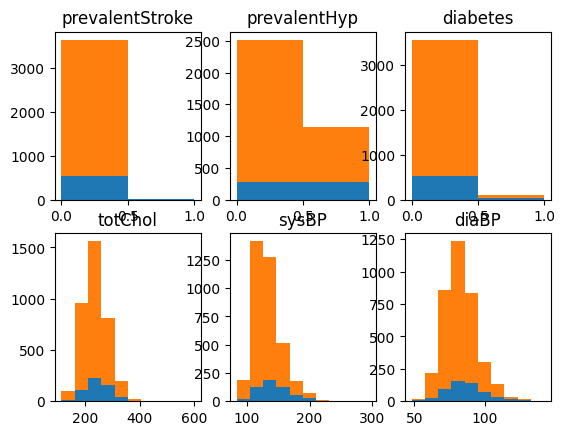

In [8]:
plt.clf()

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3)
ax0.hist((have_disease['prevalentStroke'], nohave_disease['prevalentStroke']), 2, histtype='bar', stacked=True)
ax0.set_title('prevalentStroke')
ax1.hist((have_disease['prevalentHyp'], nohave_disease['prevalentHyp']), 2, histtype='bar', stacked=True)
ax1.set_title('prevalentHyp')
ax2.hist((have_disease['diabetes'], nohave_disease['diabetes']),2, histtype='bar', stacked=True)
ax2.set_title('diabetes')
ax3.hist((have_disease['totChol'], nohave_disease['totChol']), histtype='bar', stacked=True)
ax3.set_title('totChol')
ax4.hist((have_disease['sysBP'], nohave_disease['sysBP']), histtype='bar', stacked=True)
ax4.set_title('sysBP')
ax5.hist((have_disease['diaBP'], nohave_disease['diaBP']), histtype='bar', stacked=True)
ax5.set_title('diaBP')
plt.show()


<Figure size 640x480 with 0 Axes>

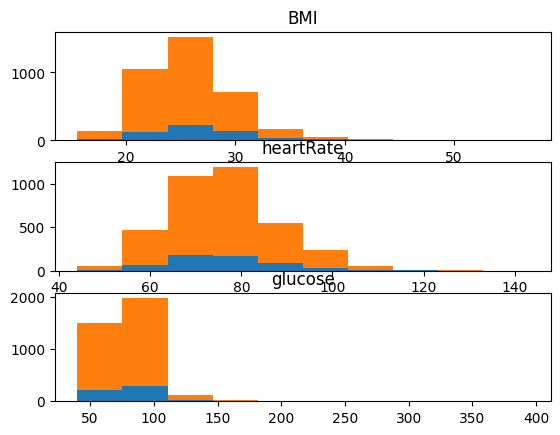

In [9]:
plt.clf()

fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=3)
ax0.hist((have_disease['BMI'], nohave_disease['BMI']), histtype='bar', stacked=True)
ax0.set_title('BMI')
ax1.hist((have_disease['heartRate'], nohave_disease['heartRate']), histtype='bar', stacked=True)
ax1.set_title('heartRate')
ax2.hist((have_disease['glucose'], nohave_disease['glucose']), histtype='bar', stacked=True)
ax2.set_title('glucose')
plt.show()

In [10]:
def normalize(dataframe, names):
    max_e, min_e = max(dataframe[names]), min(dataframe[names]) 
    print(names, max(dataframe[names]), min(dataframe[names]))
    dataframe[names] = (dataframe[names] - min_e) / (max_e - min_e)
    # print("after: ", max(dataframe[names]), min(dataframe[names]))
    return dataframe

dataframe = normalize(dataframe, 'male')
dataframe = normalize(dataframe, 'age')
dataframe = normalize(dataframe, 'education')
dataframe = normalize(dataframe, 'currentSmoker')
dataframe = normalize(dataframe, 'cigsPerDay')
dataframe = normalize(dataframe, 'BPMeds')
dataframe = normalize(dataframe, 'prevalentStroke')
dataframe = normalize(dataframe, 'prevalentHyp')
dataframe = normalize(dataframe, 'diabetes')
dataframe = normalize(dataframe, 'totChol')
dataframe = normalize(dataframe, 'sysBP')
dataframe = normalize(dataframe, 'diaBP')
dataframe = normalize(dataframe, 'BMI')
dataframe = normalize(dataframe, 'heartRate')
dataframe = normalize(dataframe, 'glucose')

male 1 0
age 70 32
education 4.0 1.0
currentSmoker 1 0
cigsPerDay 70.0 0.0
BPMeds 1.0 0.0
prevalentStroke 1 0
prevalentHyp 1 0
diabetes 1 0
totChol 600.0 113.0
sysBP 295.0 83.5
diaBP 142.5 48.0
BMI 56.8 15.54
heartRate 143.0 44.0
glucose 394.0 40.0


In [11]:
#### turn to numpy array 
trainval = dataframe.sample(frac=0.9)
train = trainval.sample(frac=0.8)
val = trainval.drop(train.index).to_numpy()
test = dataframe.drop(trainval.index).to_numpy()
train = train.to_numpy()
x_train, y_train = train[..., :15], train[..., 15]
x_val, y_val = val[..., :15], val[..., 15]
x_test, y_test = test[..., :15], test[..., 15]

In [12]:
####### machine learning approach SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.8306010928961749


In [15]:
#### LinearSVC 
import pickle
from sklearn.linear_model import LogisticRegression
clf = make_pipeline(StandardScaler(),
                    LogisticRegression(penalty='l2'))
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))
with open('LG.pkl', 'wb') as f:
    pickle.dump(clf, f)
with open('LG.pkl', 'rb') as f:
    clf2 = pickle.load(f)

x = np.random.rand(1, 15)
y = clf2.predict(x)
print(y)

0.8415300546448088
[1.]


In [7]:
### DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.76775956284153


In [8]:
#### DecisionTreeRegressor
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.7650273224043715


In [9]:
### Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8306010928961749


In [28]:
#### right here i can build a simple NN with 15 propertices we can make depenon that a
import torch 
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(15, 32)  
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 64)
        self.classify = nn.Linear(64, 2)

    def forward(self, input):
        x = F.relu(self.fc1(input))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.classify(x)
        return x

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.classify = nn.Linear(15, 1)
    def forward(self, input):
        return F.sigmod(self.classify(input))


In [32]:
model = LogisticRegression()
loss_b = torch.nn.L1Loss()
EPOCHS = 100
best_loss = float('inf')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
for epoch in range(EPOCHS):
    running_loss = 0.0
    optimizer.zero_grad()
    y_pred = model(torch.from_numpy(x_train).float()) 
    loss = loss_b(y_pred, torch.from_numpy(y_train).long())
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    print("at epoch ", epoch, ' loss: ', running_loss)
    ### validate
    if running_loss < best_loss:
            best_loss = running_loss
            torch.save(model.state_dict(), 'weight/rg_best.pt')
    # loss_val = 0.0
    # with torch.no_grad():
    #     if loss_val < best_loss:
    #         best_loss = loss_val
    #         torch.save(model.state_dict(), 'rg_best.pt')
    #     y_pred = model(torch.from_numpy(x_val).float()) 
    #     loss_v_b = loss_b(y_pred, torch.from_numpy(y_val).long())
    #     loss_val += loss_v_b
    #     if loss_val < best_loss:
    #         best_loss = loss_val
    #         torch.save(model.state_dict(), 'rg_best.pt')


/home/vikto/miniconda3/envs/faster/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2632])) that is different to the input size (torch.Size([2632, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


at epoch  0  loss:  0.15691488981246948
at epoch  1  loss:  0.15691488981246948
at epoch  2  loss:  0.15691488981246948
at epoch  3  loss:  0.15691488981246948
at epoch  4  loss:  0.15691488981246948
at epoch  5  loss:  0.15691488981246948
at epoch  6  loss:  0.15691488981246948
at epoch  7  loss:  0.15691488981246948
at epoch  8  loss:  0.15691488981246948
at epoch  9  loss:  0.15691488981246948
at epoch  10  loss:  0.15691488981246948
at epoch  11  loss:  0.15691488981246948
at epoch  12  loss:  0.15691488981246948
at epoch  13  loss:  0.15691488981246948
at epoch  14  loss:  0.15691488981246948
at epoch  15  loss:  0.15691488981246948
at epoch  16  loss:  0.15691488981246948
at epoch  17  loss:  0.15691488981246948
at epoch  18  loss:  0.15691488981246948
at epoch  19  loss:  0.15691488981246948
at epoch  20  loss:  0.15691488981246948
at epoch  21  loss:  0.15691488981246948
at epoch  22  loss:  0.15691488981246948
at epoch  23  loss:  0.15691488981246948
at epoch  24  loss:  0.156

In [33]:
from sklearn.metrics import accuracy_score
model.load_state_dict(torch.load('weight/rg_best.pt'))
model.eval()
predict = torch.where(model(torch.from_numpy(x_test).float()) > 0.5, 1, 0) 
predict = torch.argmax(predict, dim=1).cpu().numpy()
print(accuracy_score(predict, y_test))

0.855191256830601


In [23]:
model = Net()
loss_b = torch.nn.CrossEntropyLoss()
EPOCHS = 100
best_loss = float('inf')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
for epoch in range(EPOCHS):
    running_loss = 0.0
    optimizer.zero_grad()
    y_pred = model(torch.from_numpy(x_train).float()) 
    loss = loss_b(y_pred, torch.from_numpy(y_train).long())
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    print("at epoch ", epoch, ' loss: ', running_loss)
    ### validate
    loss_val = 0.0
    with torch.no_grad():
        y_pred = model(torch.from_numpy(x_val).float()) 
        loss_v_b = loss_b(y_pred, torch.from_numpy(y_val).long())
        loss_val += loss_v_b
        if loss_val < best_loss:
            best_loss = loss_val
            torch.save(model.state_dict(), 'weight/best.pt')


at epoch  0  loss:  2.4966979026794434
at epoch  1  loss:  0.5542532801628113
at epoch  2  loss:  0.6852097511291504
at epoch  3  loss:  0.9857531785964966
at epoch  4  loss:  1.1376769542694092
at epoch  5  loss:  1.165596604347229
at epoch  6  loss:  1.094115972518921
at epoch  7  loss:  0.951977014541626
at epoch  8  loss:  0.7692127823829651
at epoch  9  loss:  0.5836868286132812
at epoch  10  loss:  0.46096399426460266
at epoch  11  loss:  0.4962019920349121
at epoch  12  loss:  0.6471607685089111
at epoch  13  loss:  0.6844085454940796
at epoch  14  loss:  0.5734542608261108
at epoch  15  loss:  0.47035691142082214
at epoch  16  loss:  0.44691190123558044
at epoch  17  loss:  0.4694155752658844
at epoch  18  loss:  0.4986233115196228
at epoch  19  loss:  0.5160190463066101
at epoch  20  loss:  0.5174338221549988
at epoch  21  loss:  0.5058757662773132
at epoch  22  loss:  0.4873793125152588
at epoch  23  loss:  0.4684155583381653
at epoch  24  loss:  0.45391544699668884
at epoch 

In [24]:
from sklearn.metrics import accuracy_score
model.load_state_dict(torch.load('weight/best.pt'))
model.eval()
predict = F.softmax(model(torch.from_numpy(x_test).float()))
predict = torch.argmax(predict, dim=1).cpu().numpy()
print(accuracy_score(predict, y_test))

0.855191256830601


/tmp/ipykernel_12865/1844068044.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predict = F.softmax(model(torch.from_numpy(x_test).float()))
